## Implement Decision Trees (Iris Dataset)

In [34]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

from math import log

In [3]:
iris = load_iris()

In [4]:
X = iris.data
Y = iris.target

In [8]:
header = ['sepal_length','sepal_width','petal_length','petal_width', 'target']

df = pd.DataFrame(data = np.c_[X,Y], columns=header)

In [6]:
df.shape

(150, 5)

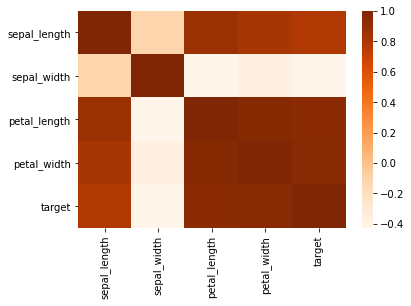

In [14]:
corr = df[header].corr()
sns.heatmap(corr, cbar=True, cmap='Oranges');

In [29]:
data = np.c_[X,Y]

In [20]:
class Pattern_match:
    '''
    Helper class for printing the tree
    '''
    
    def __init__(self, feature, val):
        self.feature = feature
        self.val = val
    
    def match(self,data):
        val = data[self.feature]
        return val >= self.val
    
    def __repr__(self):
        condition = ">="
        return "Is %s %s %s?" % (
            header[self.feature], condition, str(self.val))

In [23]:

def class_distribution(data):
    '''
    Returns a dictionary with count of each class label
    '''
    
    count_dict = {}
    
    for row in data:
        label = row[-1]
        if label not in count_dict:
            count_dict[label]=0
        count_dict[label]+=1
    return count_dict 

In [24]:
def split(data, condition):
    '''
    splits data based on the condition
    '''
    tr = []
    fl = []
    
    for row in data:
        
        if condition.match(row):
            
            tr.append(row)
        else:
            fl.append(row)
            
    return (tr, fl)

In [33]:
(tr,fl) = split(data,Pattern_match(0,5))

#### Defining Misclassification Rate

In [26]:
def mcr(data):
    '''
    return mis-classification rate
    '''
    
    count = class_distribution(data)
    
    mcr = 1
    for label in count:
        
        prob = count[label]/float(len(data))
        
        mcr -= prob**2
    return mcr

#### Defining Entropy

In [35]:
def entropy_loss(data):
    '''
    Returns cross entropy loss
    '''
    entropy=0
    log2 = lambda x:log(x)/log(2)
    
    count = class_distribution(data)
    
    for label in count: 
        prob = count[label]/float(len(data))
        entropy -= prob*log2(prob)
        
    return entropy

In [37]:
print(entropy_loss(data))

1.584962500721156


In [41]:
def info_gain(curr, left, right):
    '''
    Returns information gain on each split
    '''
    
    prob = float(len(left))/len(left)+len(right)
    
    return curr - (prob*mcr(left))-(1-prob)*mcr(right)

In [42]:
def final_split(data):
    '''
    The driver code for above methods
    The module for deciding best split at each node
    '''
    final_gain = 0
    final_pattern = None
    
    curr = mcr(data)
    
    features = len(data[0])-1
    
    for col in range(features):
        
        values = set([row[col] for row in data])
        
        for val in values:
            
            pattern = Pattern_match(col,val)
            
            (tr, fl) = split(data, pattern)
            
            if len(tr)==0 or len(fl) ==0:
                
                continue
           
            gain = info_gain(curr,tr,fl)
            
            if gain >= final_gain:
                final_gain,final_pattern = gain,pattern
                 
    return (final_gain,final_pattern)

In [43]:
class TreeNode:
    '''
    Tree Node has splitting condition, left branch (True condition) and right branch (False condition)
    '''
    def __init__(self, pattern, left_branch, right_branch):
        self.pattern = pattern
        self.left_branch = left_branch
        self.right_branch = right_branch

In [44]:
class TreeLeaf:
    '''
    Tree leaf contains all the predictions/ labels
    '''
    def __init__(self,data):
        self.predictions = class_distribution(data)

In [45]:
def decision_tree(data):
    '''
    Driver code for final_split and puts the decision tree together
    '''
    
    (gain, pattern) = final_split(data)
    
    
    if gain==0:
        return TreeLeaf(data)
    
    (tr, fl) = split(data, pattern)
    
    left_branch = decision_tree(tr)
    right_branch = decision_tree(fl)
    
    return TreeNode(pattern, left_branch, right_branch)

In [46]:
## Driver code for Decision Tree
tree = decision_tree(data)

#### Printing the tree

In [53]:
def visualize_tree(node,indent = ""):
    '''
    Prints the decision tree
    '''
    if isinstance(node,TreeLeaf):
        print(indent+"PREDICTION",node.predictions)
        return 
    
    
    print(indent + str(node.pattern))
    
    
    print(indent+ "Left Branch")
    
    visualize_tree(node.left_branch,indent + " ")
    print(indent+ "Right Branch")
    visualize_tree(node.right_branch,indent + " ")

In [54]:
visualize_tree(tree)

Is petal_length >= 6.9?
Left Branch
 PREDICTION {2.0: 1}
Right Branch
 Is sepal_width >= 4.4?
 Left Branch
  PREDICTION {0.0: 1}
 Right Branch
  Is sepal_width >= 4.2?
  Left Branch
   PREDICTION {0.0: 1}
  Right Branch
   Is sepal_length >= 7.9?
   Left Branch
    PREDICTION {2.0: 1}
   Right Branch
    Is sepal_width >= 4.1?
    Left Branch
     PREDICTION {0.0: 1}
    Right Branch
     Is sepal_width >= 4.0?
     Left Branch
      PREDICTION {0.0: 1}
     Right Branch
      Is petal_length >= 6.7?
      Left Branch
       PREDICTION {2.0: 2}
      Right Branch
       Is petal_length >= 6.6?
       Left Branch
        PREDICTION {2.0: 1}
       Right Branch
        Is petal_length >= 6.3?
        Left Branch
         PREDICTION {2.0: 1}
        Right Branch
         Is sepal_length >= 7.7?
         Left Branch
          PREDICTION {2.0: 1}
         Right Branch
          Is sepal_length >= 7.4?
          Left Branch
           PREDICTION {2.0: 1}
          Right Branch
           Is 